In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [28]:
df=pd.read_csv('TSLA.CSV')

In [29]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [30]:
#univariate timeseries
sdf=df[['Date','Close']]

In [31]:
sdf.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [32]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [33]:
sdf['Date']=pd.to_datetime(sdf['Date'])

/tmp/ipykernel_300549/2262520851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Date']=pd.to_datetime(sdf['Date'])


In [34]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [35]:
sdf=sdf.set_index('Date')

In [36]:
sdf ##why converting to index= easy retriving of data, simple visualization,lib(scipy,statsmodel) require date column as index

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [37]:
## EDA
sdf.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


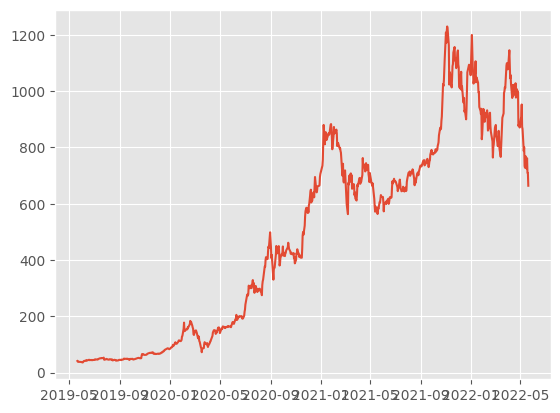

In [38]:
plt.plot(sdf.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

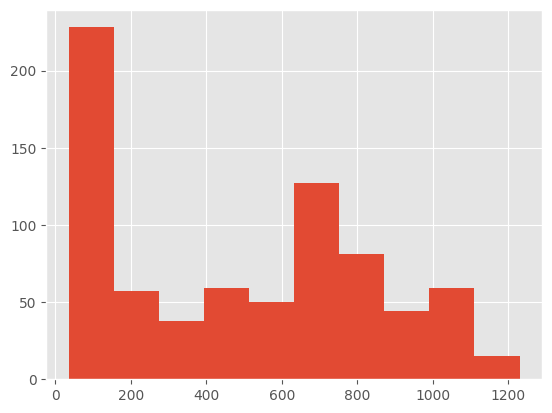

In [39]:
plt.hist(sdf.Close)

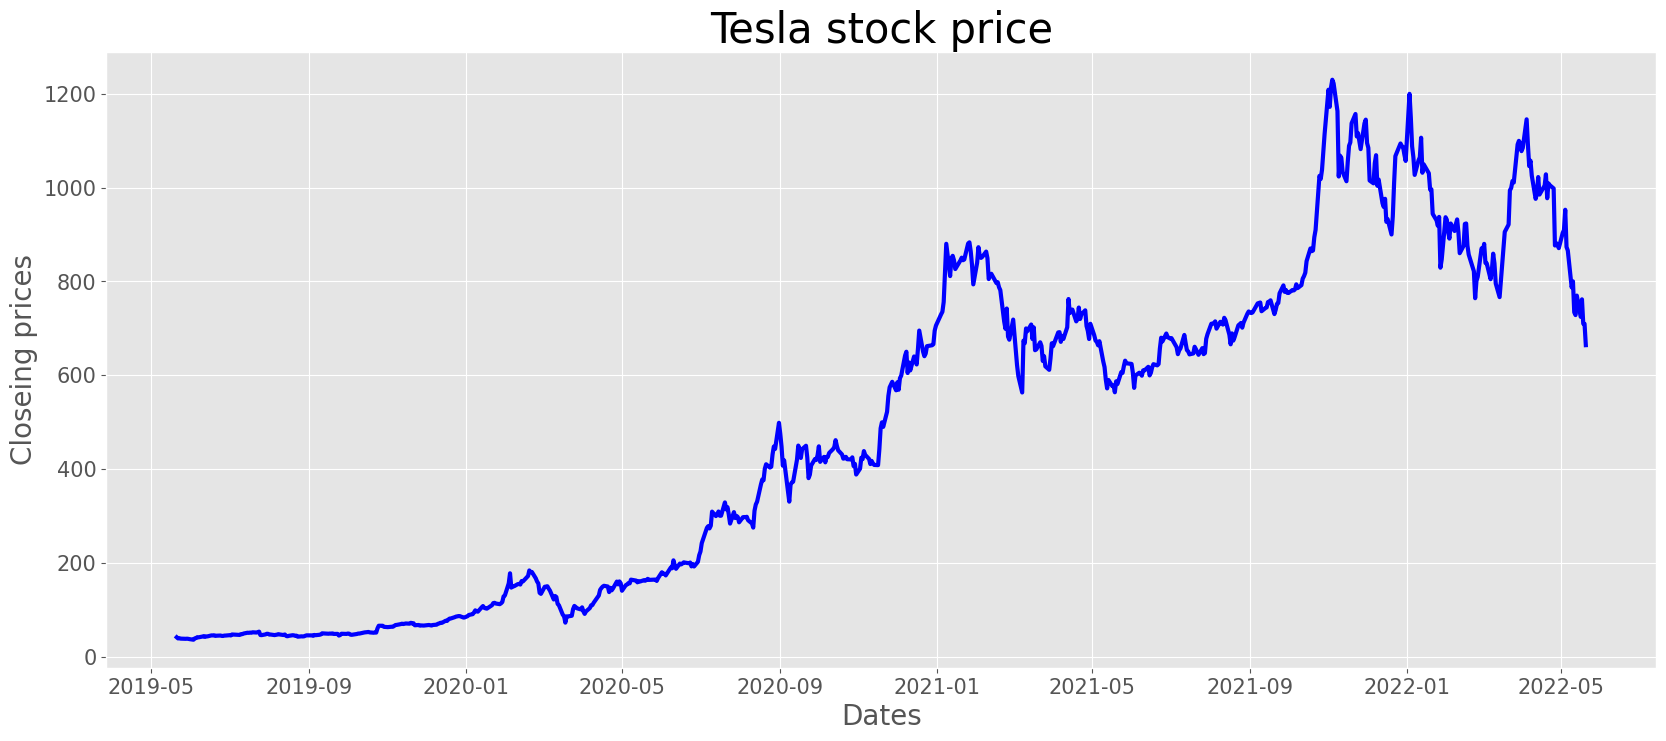

In [40]:
plt.style.use('ggplot')
plt.figure(figsize=(20,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Closeing prices',fontsize=20)
plt.yticks(fontsize=15)
plt.plot(sdf['Close'],linewidth=3,color='blue')
plt.title('Tesla stock price',fontsize=30)
plt.show()

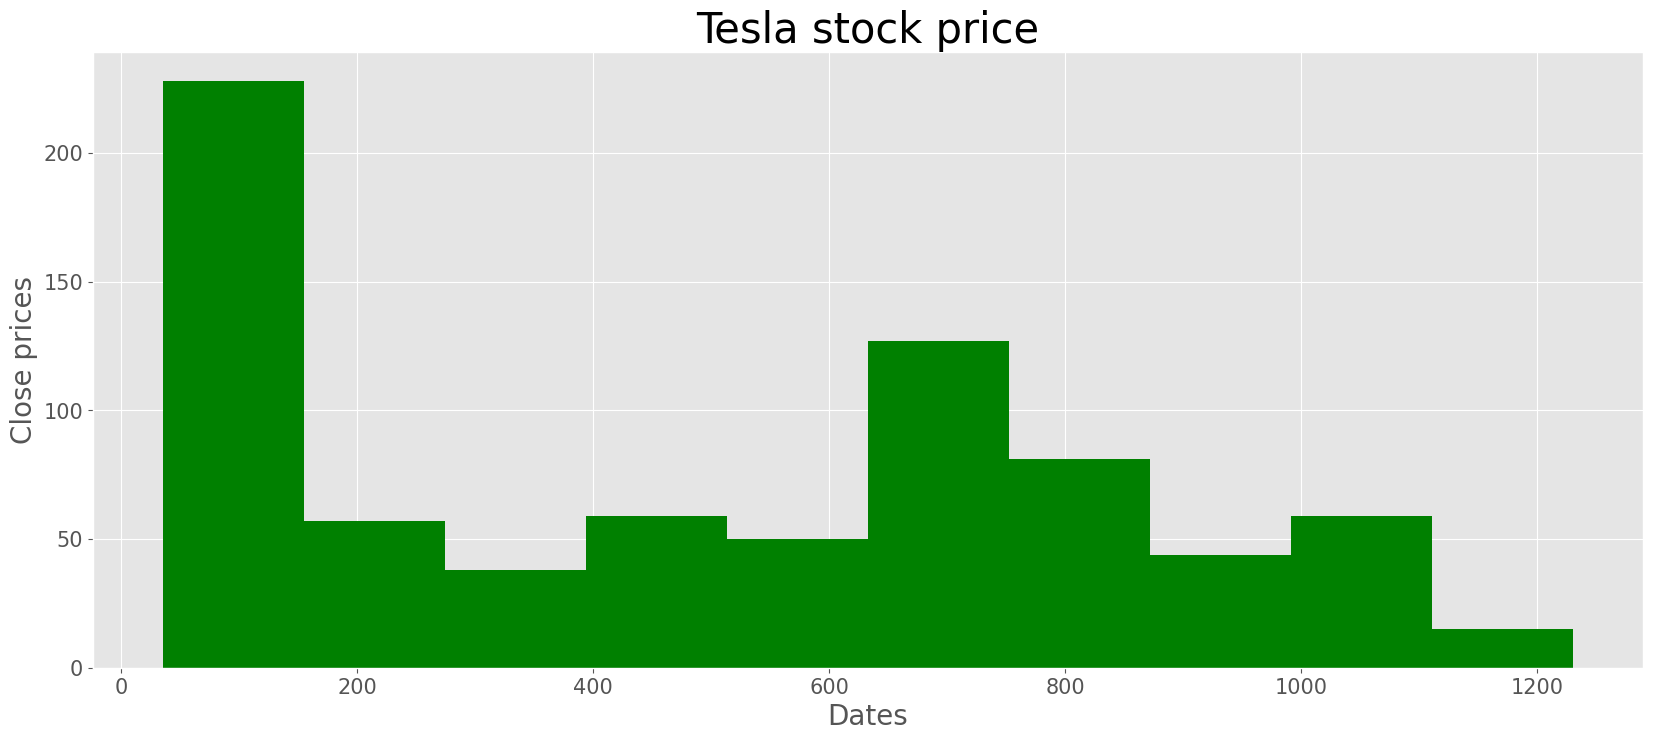

In [41]:
plt.style.use('ggplot')
plt.figure(figsize=(20,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close prices',fontsize=20)
plt.yticks(fontsize=15)
plt.hist(sdf['Close'],linewidth=3,color='green')
plt.title('Tesla stock price',fontsize=30)
plt.show()

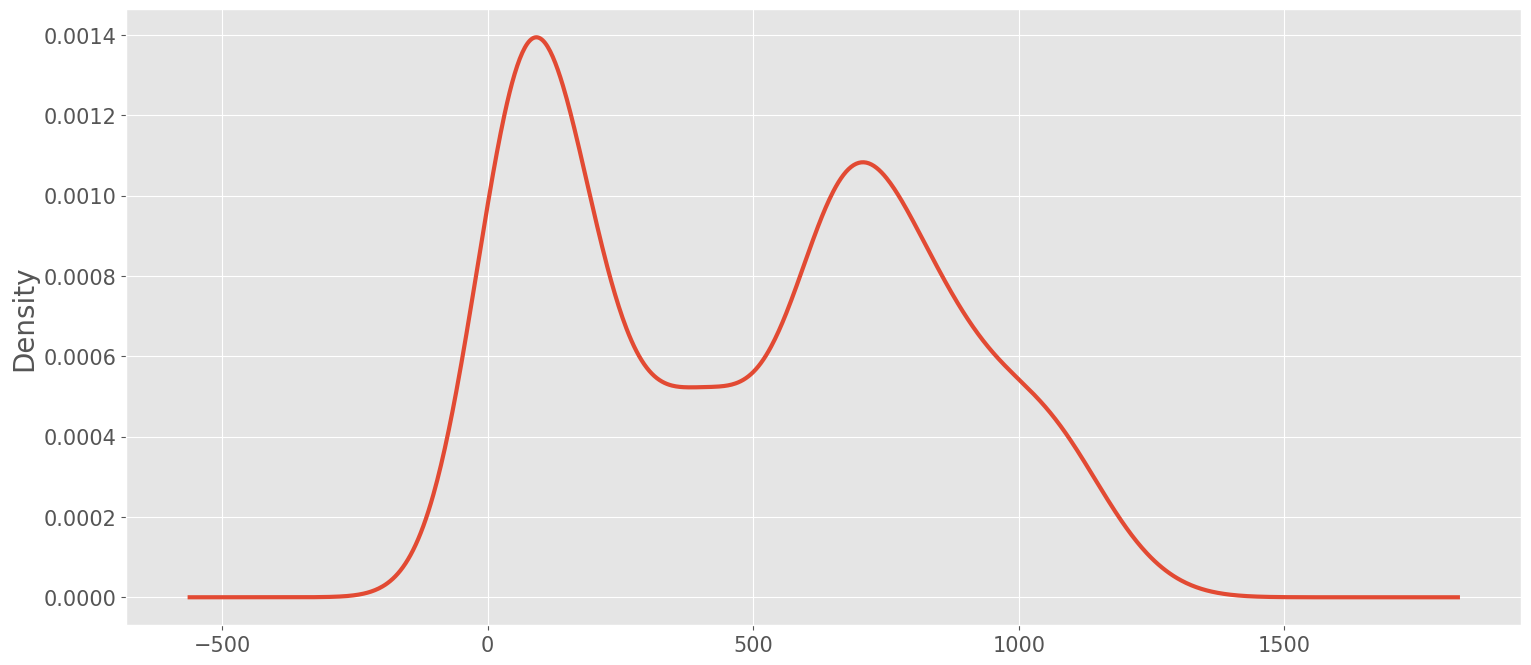

In [42]:
df_close=sdf['Close']
df_close.plot(kind='kde',figsize=(18,8),linewidth=3)
plt.xticks(fontsize=15)
plt.grid('both')
plt.ylabel('Density',fontsize=20)
plt.yticks(fontsize=15)
plt.show()

In [43]:
rollmean=sdf['Close'].rolling(50).mean()

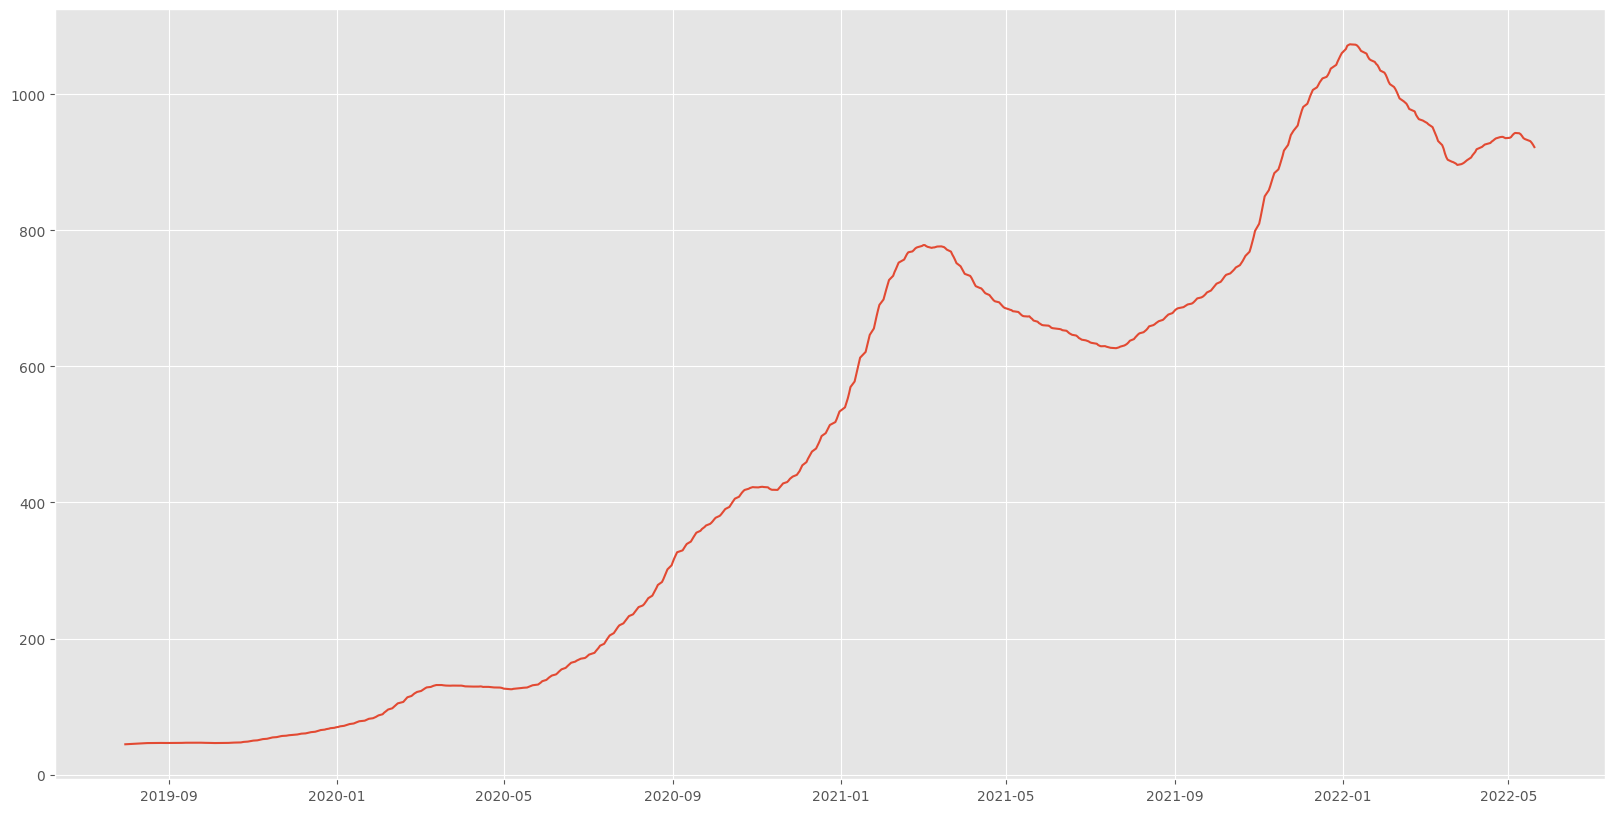

In [44]:
plt.figure(figsize=(20,10))
plt.plot(rollmean)

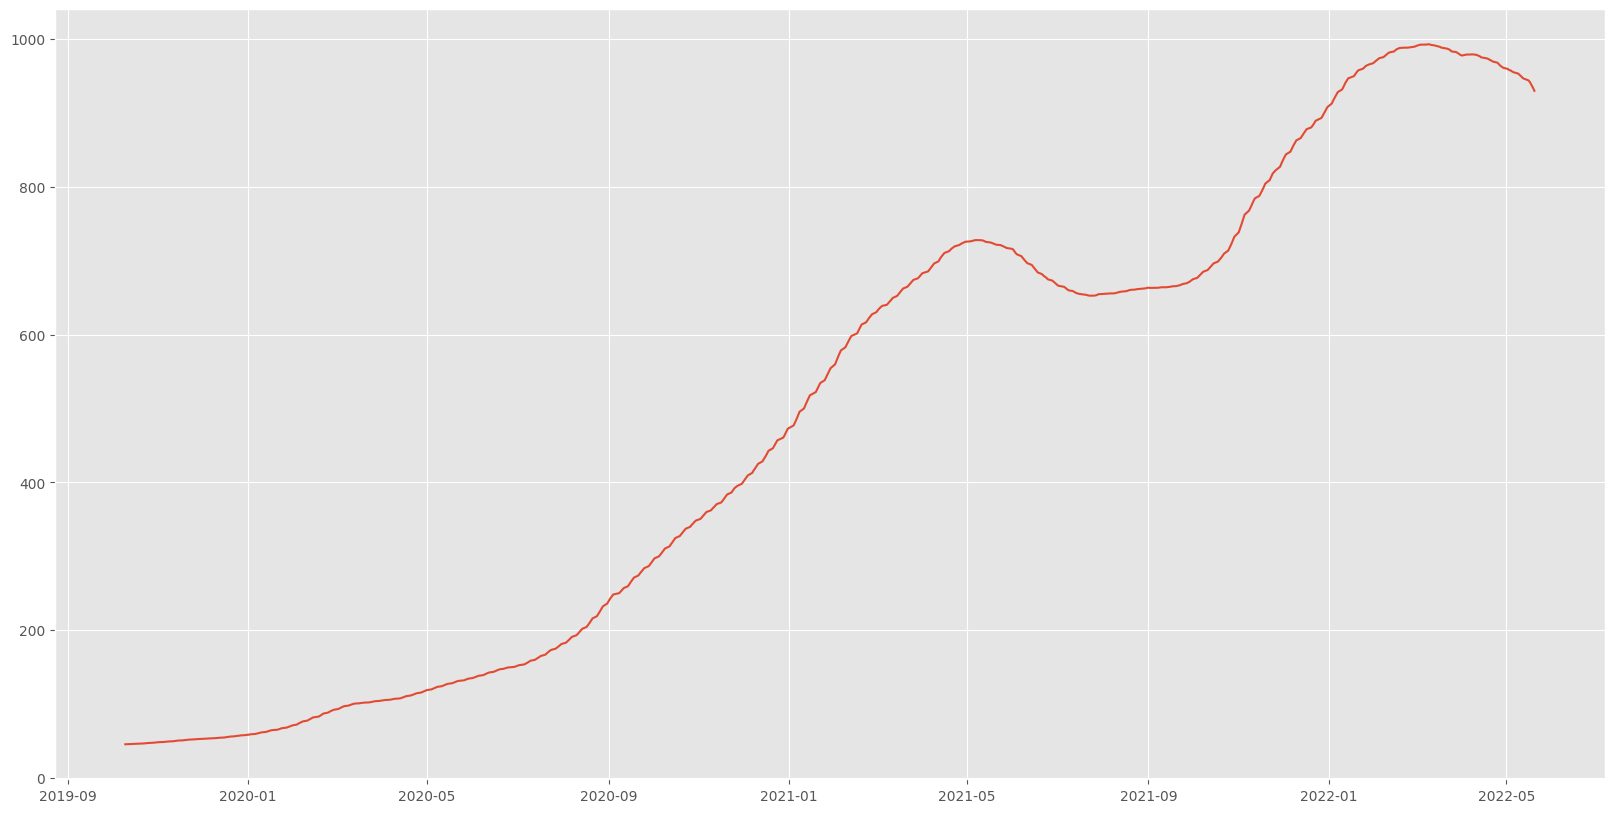

In [45]:
plt.figure(figsize=(20,10))
rollmean=sdf['Close'].rolling(100).mean() ## more smoothning with more rolling value
plt.plot(rollmean)

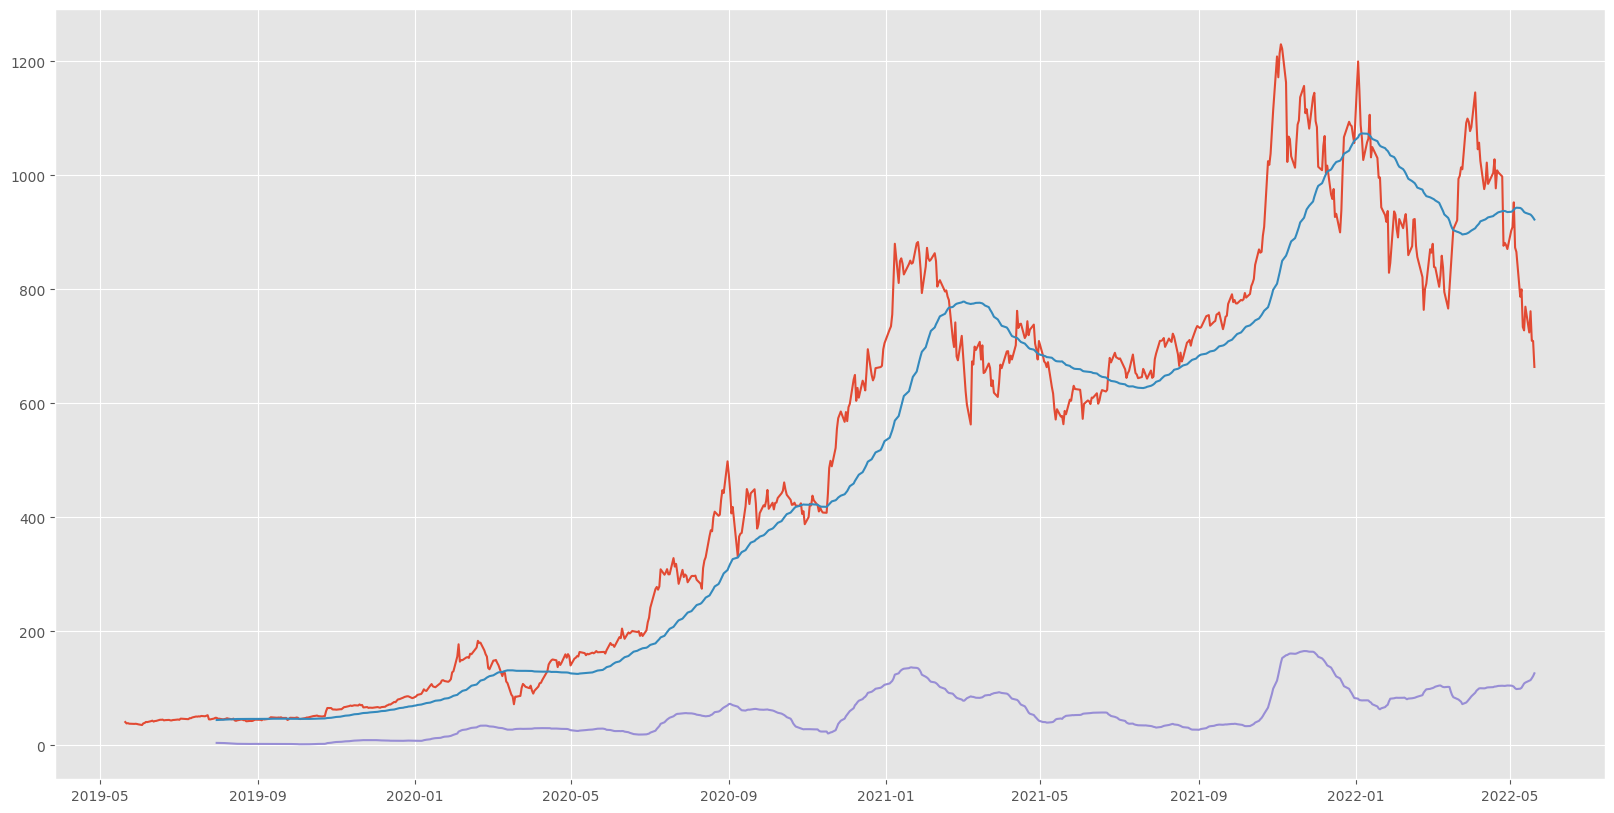

In [46]:
plt.figure(figsize=(20,10))
plt.plot(sdf.Close)
plt.plot(sdf['Close'].rolling(50).mean())
plt.plot(sdf['Close'].rolling(50).std())

In [47]:
## adafuller test
!pip install statsmodels
from statsmodels.tsa.stattools import adfuller
adft=adfuller(sdf['Close'])

In [48]:
adft[0:4]

(-1.36300858170375, 0.5998762543050691, 9, 748)

In [49]:
pd.Series(adft[0:4],index=['test stats','p-value','lag','datapoints'])

test stats     -1.363009
p-value         0.599876
lag             9.000000
datapoints    748.000000
dtype: float64

In [50]:
def check_stationarity(timeseries):
    rollmean=timeseries.rolling(50).mean()
    rollstd=timeseries.rolling(50).std()
    
    plt.figure(figsize=(18,8))
    plt.grid('both')
    plt.plot(timeseries,color='blue',label='Original',linewidth=3)
    plt.plot(rollmean,color='red',label='rollmean',linewidth=3)
    plt.plot(rollstd,color='black',label='rollstd',linewidth=3)
    plt.legend(loc='best',fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')
    plt.title('rolling mean and standard deviation',fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show(block=False)
    
    print('result of dickey fuller test')
    adft=adfuller(sdf,autolag='AIC')
    
    
    output=pd.Series(adft[0:4],index=['test stats','p-value','lag','datapoints'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key]= values
    print(output)

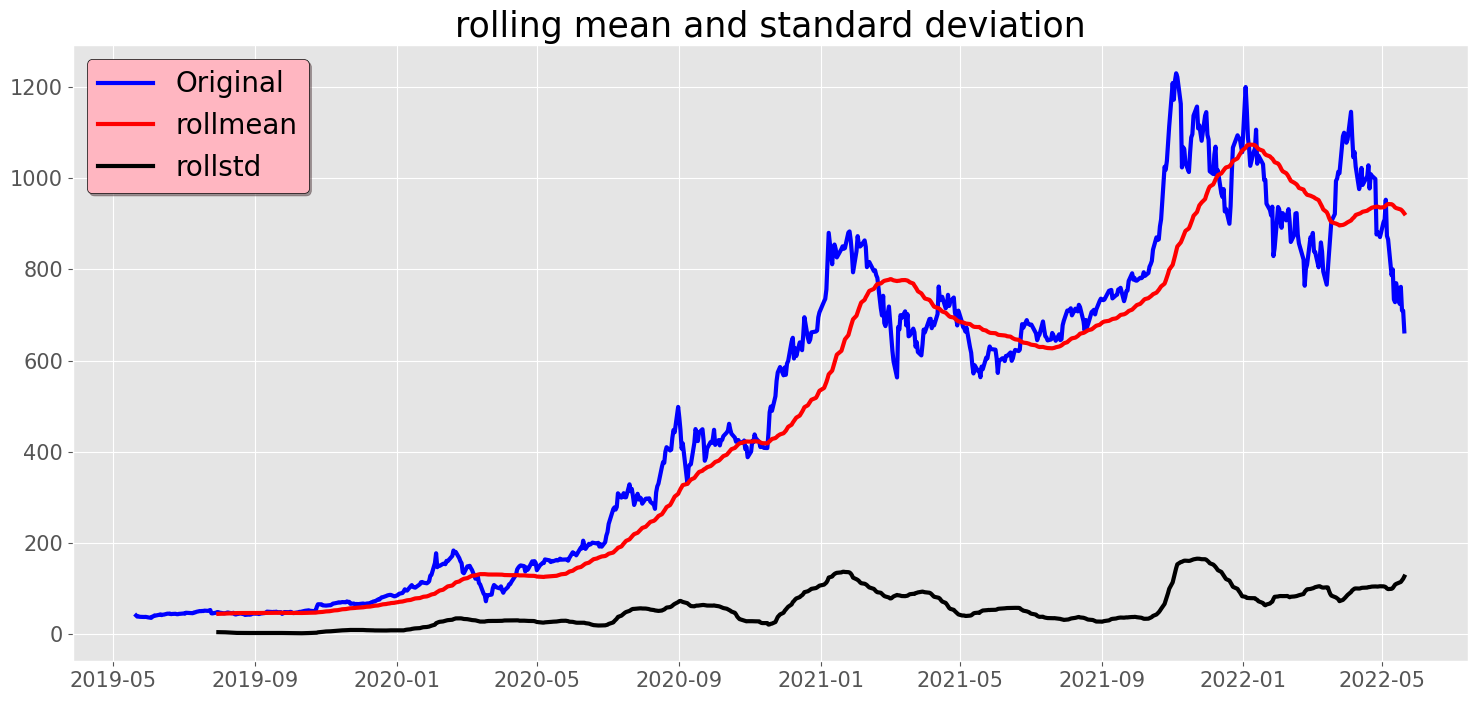

result of dickey fuller test
test stats               -1.363009
p-value                   0.599876
lag                       9.000000
datapoints              748.000000
critical value (1%)      -3.439123
critical value (5%)      -2.865412
critical value (10%)     -2.568832
dtype: float64


In [51]:
check_stationarity(sdf.Close)

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(sdf[['Close']],period=12) ## put model=multiplicative to for multiplicative model

In [53]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 2000x1000 with 0 Axes>

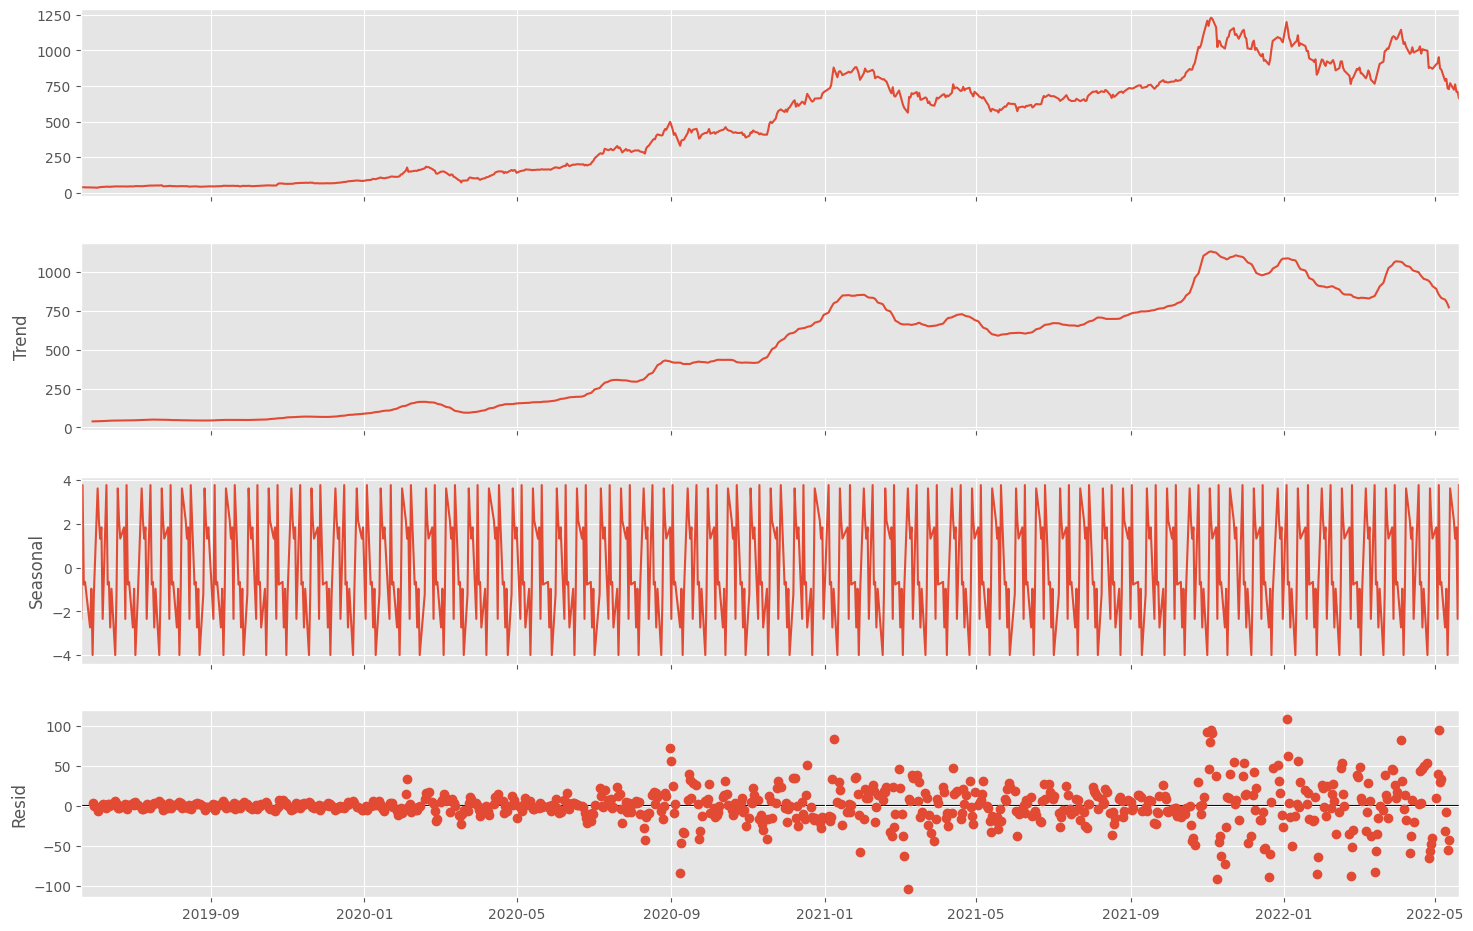

In [54]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)
           

<Axes: >

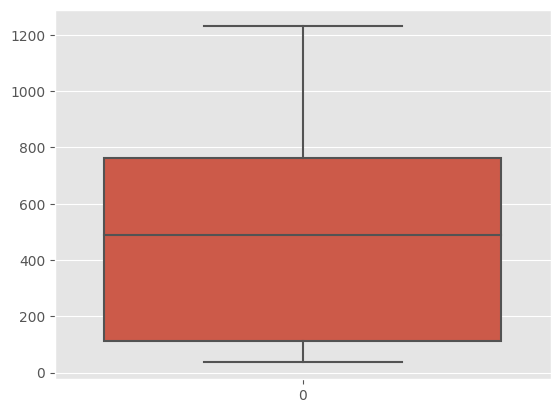

In [55]:
## to check for outlier
import seaborn as sb
sb.boxplot(sdf.Close)

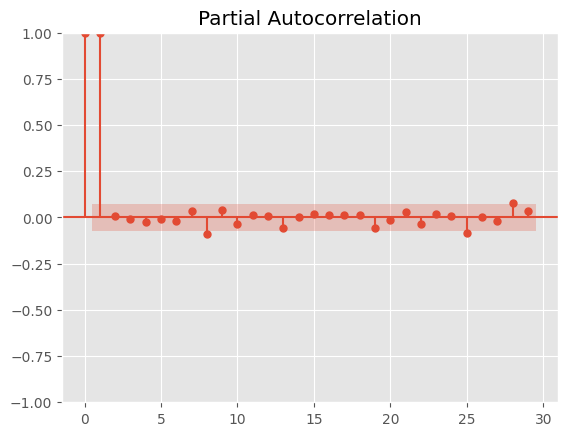

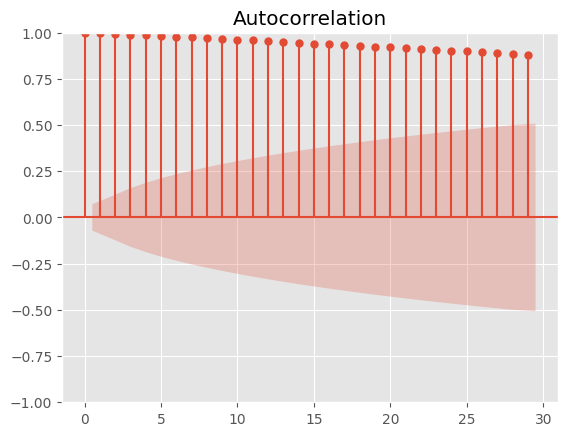

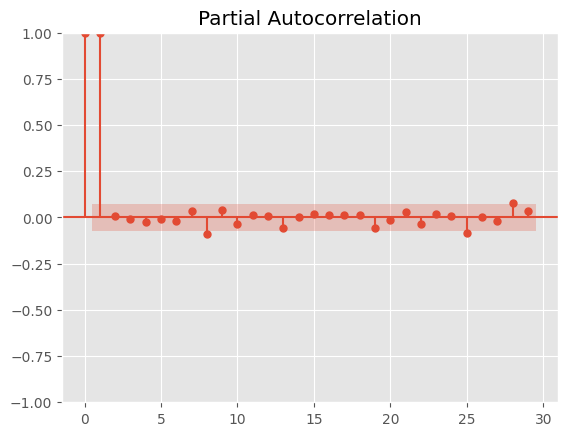

In [56]:
## autocorrelation and partial correlation
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(sdf.Close)
plot_pacf(sdf.Close)

In [57]:
df_close=sdf['Close']

In [58]:
df_close

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [59]:
df_close=df_close.diff()
df_close=df_close.dropna()

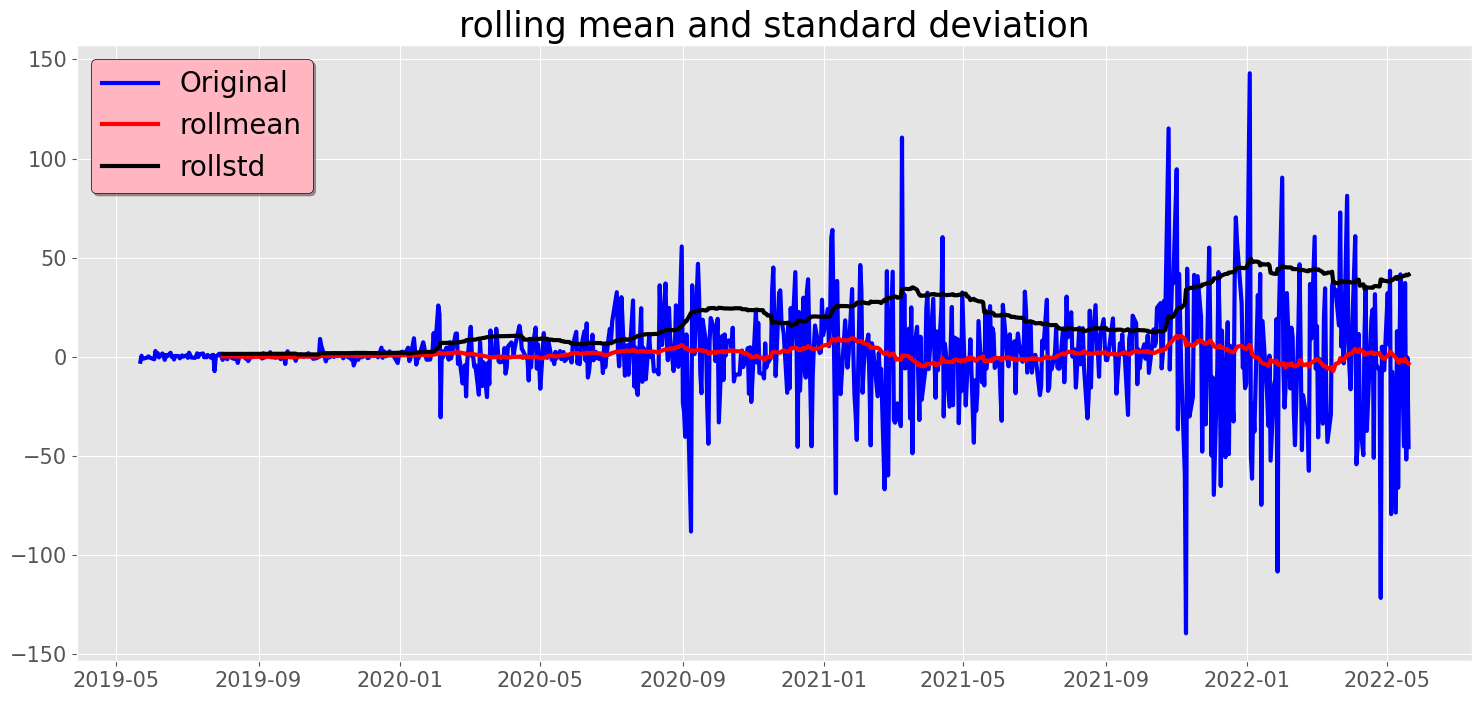

result of dickey fuller test
test stats               -1.363009
p-value                   0.599876
lag                       9.000000
datapoints              748.000000
critical value (1%)      -3.439123
critical value (5%)      -2.865412
critical value (10%)     -2.568832
dtype: float64


In [60]:
check_stationarity(df_close)

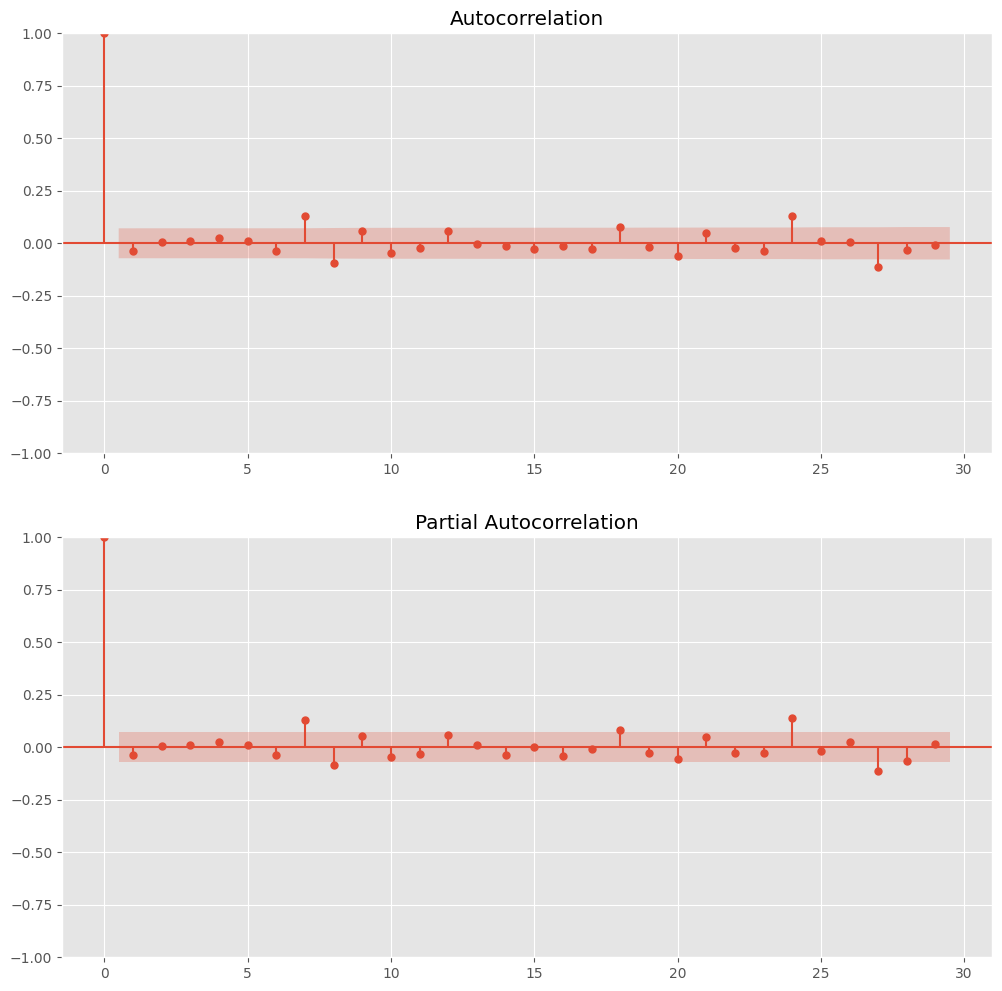

In [61]:
fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(211)
fig=plot_acf(df_close,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df_close,ax=ax2)

In [62]:
train_data=df_close[0:-60]
test_data=df_close[-60:]

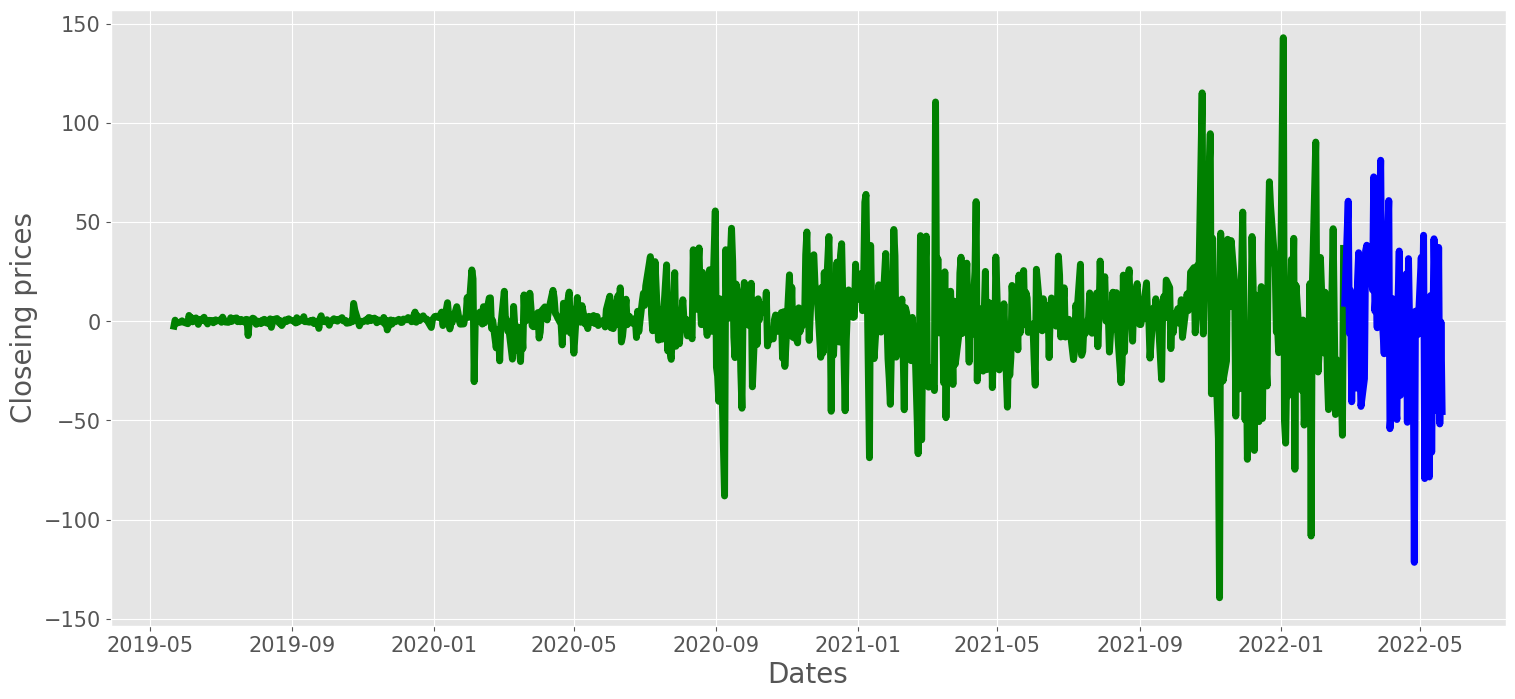

In [63]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Closeing prices',fontsize=20)
plt.yticks(fontsize=15)
plt.plot(train_data,'green',label='train data',linewidth=5)
plt.plot(test_data,'blue',label='test data',linewidth=5)


In [64]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [65]:
history=[x for x in train_data]

In [66]:
model=ARIMA(history,order=(1,1,1)) ##(P,d,q)

In [67]:
model=model.fit()

In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  697
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3148.870
Date:                Sun, 11 Jun 2023   AIC                           6303.741
Time:                        11:26:30   BIC                           6317.377
Sample:                             0   HQIC                          6309.013
                                - 697                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0285      0.025     -1.150      0.250      -0.077       0.020
ma.L1         -0.9991      0.012    -81.341      0.000      -1.023      -0.975
sigma2       493.6006     12.978     38.035      0.000     468.165     519.036
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2092.37
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              31.85   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
model.forecast()


array([0.04741687])

In [70]:
model.forecast()[0]

0.04741686925201094

In [71]:
test_data[0]

9.0999755859375

In [72]:
mean_squared_error([test_data[0]],model.forecast())

81.94881931903844

In [73]:
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

9.052558716685489

In [74]:
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

In [75]:
for i in p_values:
  for j in d_values:
    for k in q_values:
      print(i,j,k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [76]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [77]:
def evaluate_models(dataset,test,p_values,d_values,q_values):
  dataset=dataset.astype('float32')
  best_score,best_cfg=float('inf'),None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order=(p,d,q)
        try:
          rmse=train_arima_model(dataset,test,order)
          if rmse<best_score:
            best_score,best_cfg=rmse,order
          print('ARIMA%s RMSE=%.3f'%(order,rmse))
        except:
          continue
  print('best ARIMA%s RMSE=%.3f'%(best_cfg,best_score))

In [78]:
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data,test_data,p_values,d_values,q_values)


ARIMA(0, 0, 0) RMSE=39.610
ARIMA(0, 0, 1) RMSE=39.578
ARIMA(0, 0, 2) RMSE=39.728
ARIMA(0, 1, 0) RMSE=57.835
ARIMA(0, 1, 1) RMSE=39.611
ARIMA(0, 1, 2) RMSE=39.580
ARIMA(0, 2, 0) RMSE=104.683
ARIMA(0, 2, 1) RMSE=57.876
ARIMA(0, 2, 2) RMSE=39.581
ARIMA(1, 0, 0) RMSE=39.570
ARIMA(1, 0, 1) RMSE=39.636
ARIMA(1, 0, 2) RMSE=40.047
ARIMA(1, 1, 0) RMSE=46.184
ARIMA(1, 1, 1) RMSE=39.573
ARIMA(1, 1, 2) RMSE=39.731
ARIMA(1, 2, 0) RMSE=68.740
ARIMA(1, 2, 1) RMSE=46.221
ARIMA(1, 2, 2) RMSE=39.503
ARIMA(2, 0, 0) RMSE=39.746
ARIMA(2, 0, 1) RMSE=39.884
ARIMA(2, 0, 2) RMSE=40.113
ARIMA(2, 1, 0) RMSE=45.781
ARIMA(2, 1, 1) RMSE=39.739
ARIMA(2, 1, 2) RMSE=39.732
ARIMA(2, 2, 0) RMSE=63.008
ARIMA(2, 2, 1) RMSE=45.809
best ARIMA(1, 2, 2) RMSE=39.503


In [79]:
history=[x for x in train_data]
predictions=list()
for i in range(len(test_data)):
  model=ARIMA(history,order=(1,2,2))
  model=model.fit()
  fc=model.forecast(alpha=0.05)
  predictions.append(fc)
  history.append(test_data[i])
print(f'RMSE is {np.sqrt(mean_squared_error(test_data,predictions))}')

RMSE is 39.58506285717416


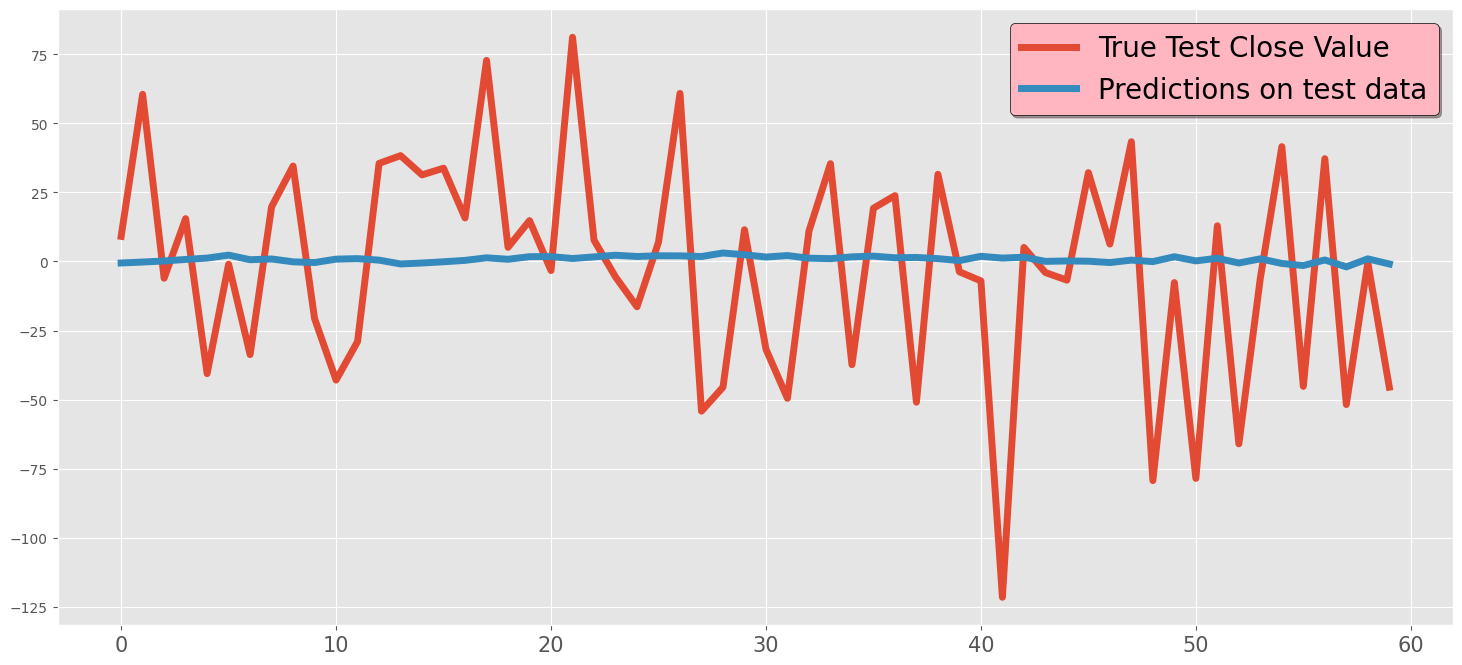

In [80]:
plt.figure(figsize=(18,8))
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [81]:
fc_series = pd.Series(predictions, index=test_data.index)

In [82]:
fc_series

Date
2022-02-25     [-0.5382031833474912]
2022-02-28    [-0.19726501566560728]
2022-03-01     [0.18798749777012347]
2022-03-02      [0.7410290606737817]
2022-03-03      [1.2363461421827608]
2022-03-04       [2.308446549338143]
2022-03-07       [0.644104859813865]
2022-03-08      [0.9157900258450127]
2022-03-09    [-0.11935206466138482]
2022-03-10     [-0.3810967831383465]
2022-03-11      [0.8570077917027703]
2022-03-14       [1.043684545379108]
2022-03-15     [0.49427610190107707]
2022-03-16     [-0.8942195837999662]
2022-03-17     [-0.5479656035831866]
2022-03-18    [-0.09820023392589405]
2022-03-21      [0.4079571456981981]
2022-03-22       [1.336438228024277]
2022-03-23      [0.8053961786209243]
2022-03-24      [1.7452273494072585]
2022-03-25      [1.7829898315159554]
2022-03-28      [1.0797258736814221]
2022-03-29       [1.670479557718778]
2022-03-30      [2.2652731894419276]
2022-03-31      [1.8143567062248955]
2022-04-01       [2.070959171353124]
2022-04-04      [2.04131911089620

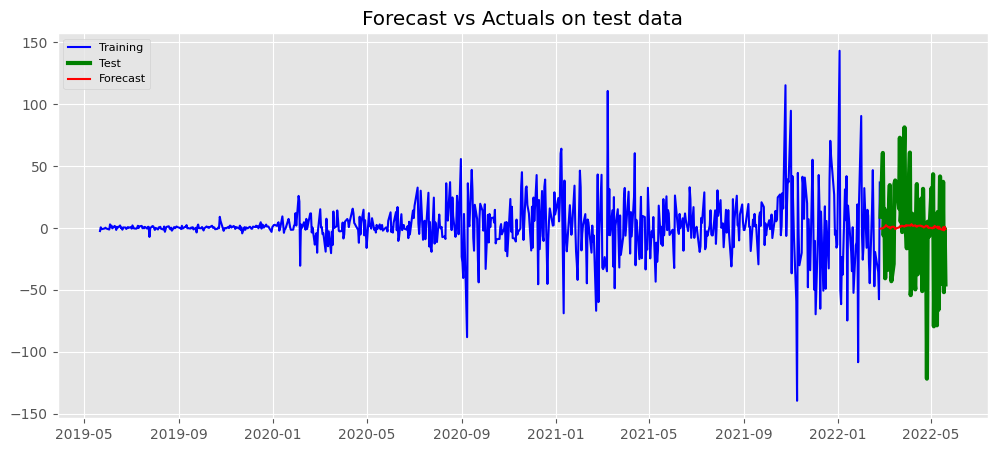

In [83]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

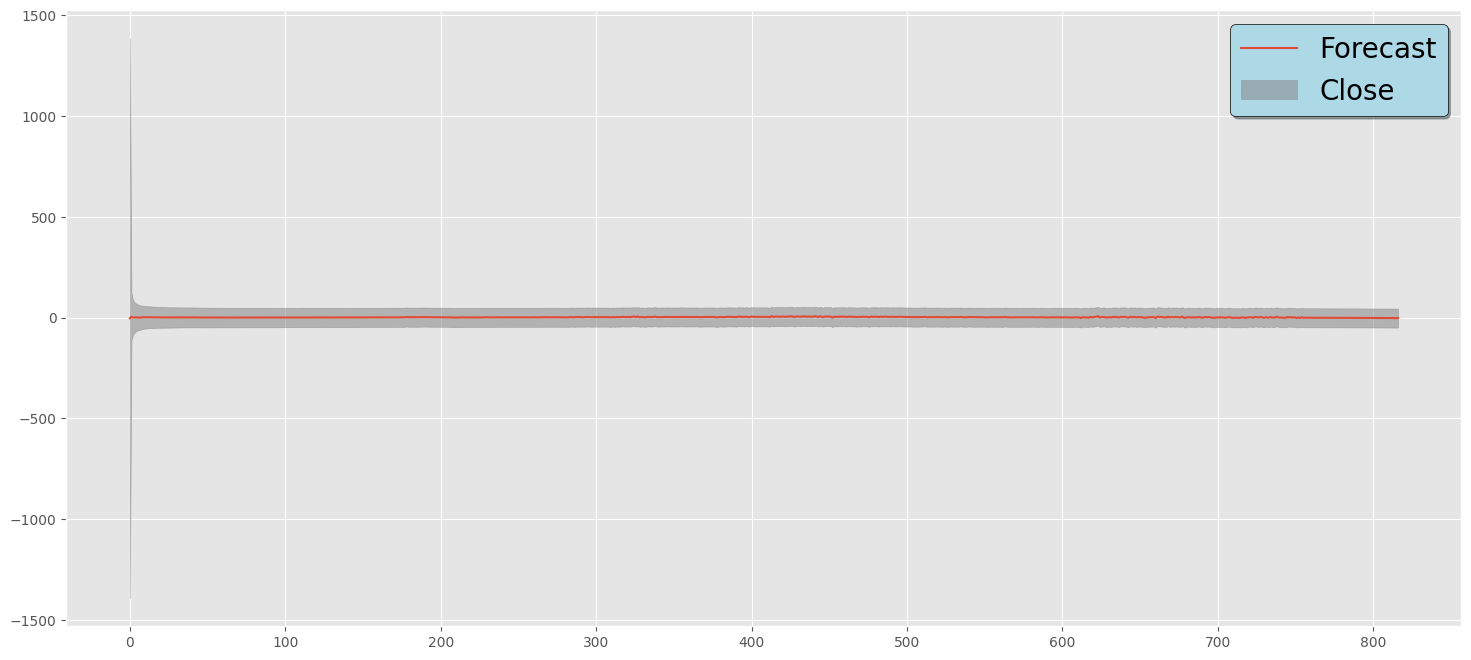

In [84]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model,start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

In [85]:
import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96876D+00    |proj g|=  1.34143D-01

At iterate    5    f=  4.87968D+00    |proj g|=  7.20622D-03

At iterate   10    f=  4.85721D+00    |proj g|=  9.96355D-03


 This problem is unconstrained.



At iterate   15    f=  4.85694D+00    |proj g|=  1.22392D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     21      1     0     0   2.558D-07   4.857D+00
  F =   4.8569414704751841     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96763D+00    |proj g|=  1.33593D-01

At iterate    5    f=  4.87901D+00    |proj g|=  7.18877D-03


 This problem is unconstrained.



At iterate   10    f=  4.85672D+00    |proj g|=  1.12462D-02

At iterate   15    f=  4.85649D+00    |proj g|=  8.44302D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     21      1     0     0   8.443D-07   4.856D+00
  F =   4.8564889095019961     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96459D+00    |proj g|=  1.29865D-01

At iterate    5    f=  4.87988D+00    |proj g|=  7.04083D-03


 This problem is unconstrained.



At iterate   10    f=  4.85864D+00    |proj g|=  9.72437D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     18      1     0     0   6.079D-06   4.859D+00
  F =   4.8585385486059929     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96921D+00    |proj g|=  1.31454D-01

At iterate    5    f=  4.88524D+00    |proj g|=  7.06497D-03


 This problem is unconstrained.



At iterate   10    f=  4.86374D+00    |proj g|=  1.17431D-03

At iterate   15    f=  4.86328D+00    |proj g|=  4.42579D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   4.426D-07   4.863D+00
  F =   4.8632781542816819     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97171D+00    |proj g|=  1.34068D-01

At iterate    5    f=  4.88577D+00    |proj g|=  7.11844D-03


 This problem is unconstrained.



At iterate   10    f=  4.86369D+00    |proj g|=  2.46056D-03

At iterate   15    f=  4.86328D+00    |proj g|=  9.71842D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     21      1     0     0   3.107D-06   4.863D+00
  F =   4.8632776172460019     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96969D+00    |proj g|=  1.31523D-01


 This problem is unconstrained.



At iterate    5    f=  4.88625D+00    |proj g|=  7.06630D-03

At iterate   10    f=  4.86471D+00    |proj g|=  2.50552D-03

At iterate   15    f=  4.86424D+00    |proj g|=  2.92300D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   2.923D-07   4.864D+00
  F =   4.8642418105961154     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97009D+00    |proj g|=  1.31480D-01


 This problem is unconstrained.



At iterate    5    f=  4.88582D+00    |proj g|=  7.06216D-03

At iterate   10    f=  4.86437D+00    |proj g|=  2.87568D-03

At iterate   15    f=  4.86391D+00    |proj g|=  3.45781D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     20      1     0     0   1.321D-05   4.864D+00
  F =   4.8639139683062158     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96806D+00    |proj g|=  1.29792D-01

At iterate    5    f=  4.88510D+00    |proj g|=  7.01891D-03

At iterate   10    f=  4.86397D+00    |proj g|=  5.85200D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     16      1     0     0   9.977D-06   4.864D+00
  F =   4.8636326597210688     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10



 This problem is unconstrained.



At iterate   15    f=  4.86569D+00    |proj g|=  1.83524D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   1.835D-06   4.866D+00
  F =   4.8656887311840213     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96863D+00    |proj g|=  1.29396D-01

At iterate    5    f=  4.88602D+00    |proj g|=  6.94382D-03

At iterate   10    f=  4.86547D+00    |proj g|=  1.41846D-03


 This problem is unconstrained.



At iterate   15    f=  4.86502D+00    |proj g|=  2.19883D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     20      1     0     0   4.773D-07   4.865D+00
  F =   4.8650177767634233     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97035D+00    |proj g|=  1.30833D-01

At iterate    5    f=  4.88703D+00    |proj g|=  6.97445D-03


 This problem is unconstrained.



At iterate   10    f=  4.86614D+00    |proj g|=  5.36428D-03

At iterate   15    f=  4.86578D+00    |proj g|=  5.05858D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     21      1     0     0   1.160D-05   4.866D+00
  F =   4.8657844635295637     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96995D+00    |proj g|=  1.30621D-01

At iterate    5    f=  4.88646D+00    |proj g|=  6.97330D-03


 This problem is unconstrained.



At iterate   10    f=  4.86561D+00    |proj g|=  9.55188D-03

At iterate   15    f=  4.86526D+00    |proj g|=  1.01947D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     20      1     0     0   3.104D-07   4.865D+00
  F =   4.8652557459906625     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96927D+00    |proj g|=  1.30628D-01

At iterate    5    f=  4.88577D+00    |proj g|=  6.97397D-03


 This problem is unconstrained.



At iterate   10    f=  4.86477D+00    |proj g|=  7.94108D-03

At iterate   15    f=  4.86459D+00    |proj g|=  2.31379D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     18      1     0     0   2.314D-06   4.865D+00
  F =   4.8645926987159287     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97607D+00    |proj g|=  1.33921D-01

At iterate    5    f=  4.89019D+00    |proj g|=  7.08027D-03


 This problem is unconstrained.



At iterate   10    f=  4.86829D+00    |proj g|=  1.87629D-03

At iterate   15    f=  4.86782D+00    |proj g|=  4.02949D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   4.029D-06   4.868D+00
  F =   4.8678154415486299     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97431D+00    |proj g|=  1.33160D-01

At iterate    5    f=  4.88952D+00    |proj g|=  7.07882D-03


 This problem is unconstrained.



At iterate   10    f=  4.86770D+00    |proj g|=  1.36017D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     18      1     0     0   3.109D-06   4.867D+00
  F =   4.8672146532844280     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97393D+00    |proj g|=  1.33128D-01

At iterate    5    f=  4.88921D+00    |proj g|=  7.06893D-03


 This problem is unconstrained.



At iterate   10    f=  4.86735D+00    |proj g|=  1.42152D-03

At iterate   15    f=  4.86695D+00    |proj g|=  3.06768D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   3.068D-06   4.867D+00
  F =   4.8669475352906817     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97331D+00    |proj g|=  1.32520D-01

At iterate    5    f=  4.88843D+00    |proj g|=  7.04558D-03


 This problem is unconstrained.



At iterate   10    f=  4.86652D+00    |proj g|=  1.65233D-03

At iterate   15    f=  4.86637D+00    |proj g|=  2.08322D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     18      1     0     0   2.083D-06   4.866D+00
  F =   4.8663651691056717     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97352D+00    |proj g|=  1.33377D-01

At iterate    5    f=  4.88804D+00    |proj g|=  7.07340D-03


 This problem is unconstrained.



At iterate   10    f=  4.86614D+00    |proj g|=  3.56230D-03

At iterate   15    f=  4.86577D+00    |proj g|=  2.72582D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   2.726D-07   4.866D+00
  F =   4.8657738882700645     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97473D+00    |proj g|=  1.33977D-01

At iterate    5    f=  4.88869D+00    |proj g|=  7.10392D-03


 This problem is unconstrained.



At iterate   10    f=  4.86665D+00    |proj g|=  1.52934D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     16      1     0     0   1.997D-06   4.866D+00
  F =   4.8662127334642058     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97536D+00    |proj g|=  1.33575D-01

At iterate    5    f=  4.89058D+00    |proj g|=  7.12137D-03


 This problem is unconstrained.



At iterate   10    f=  4.86831D+00    |proj g|=  4.98555D-03

At iterate   15    f=  4.86796D+00    |proj g|=  5.26769D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     20      1     0     0   2.867D-05   4.868D+00
  F =   4.8679589757845267     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97361D+00    |proj g|=  1.32562D-01

At iterate    5    f=  4.89003D+00    |proj g|=  7.11634D-03


 This problem is unconstrained.



At iterate   10    f=  4.86785D+00    |proj g|=  4.36225D-03

At iterate   15    f=  4.86749D+00    |proj g|=  1.88669D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     21      1     0     0   8.407D-07   4.867D+00
  F =   4.8674919248452655     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97216D+00    |proj g|=  1.31091D-01

At iterate    5    f=  4.88989D+00    |proj g|=  7.07154D-03


 This problem is unconstrained.



At iterate   10    f=  4.86814D+00    |proj g|=  1.23447D-03

At iterate   15    f=  4.86768D+00    |proj g|=  2.46976D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   2.470D-06   4.868D+00
  F =   4.8676826238180695     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97528D+00    |proj g|=  1.29347D-01

At iterate    5    f=  4.89504D+00    |proj g|=  7.02253D-03


 This problem is unconstrained.



At iterate   10    f=  4.87309D+00    |proj g|=  3.48803D-03

At iterate   15    f=  4.87287D+00    |proj g|=  1.01581D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     21      1     0     0   1.016D-06   4.873D+00
  F =   4.8728672527245189     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.98063D+00    |proj g|=  1.32140D-01

At iterate    5    f=  4.89778D+00    |proj g|=  7.06392D-03


 This problem is unconstrained.



At iterate   10    f=  4.87556D+00    |proj g|=  1.15312D-03

At iterate   15    f=  4.87511D+00    |proj g|=  1.89004D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   1.890D-07   4.875D+00
  F =   4.8751069257985442     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.98171D+00    |proj g|=  1.33654D-01

At iterate    5    f=  4.89831D+00    |proj g|=  7.11924D-03


 This problem is unconstrained.



At iterate   10    f=  4.87549D+00    |proj g|=  1.11461D-03

At iterate   15    f=  4.87506D+00    |proj g|=  1.89884D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   1.899D-06   4.875D+00
  F =   4.8750627399223161     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.98012D+00    |proj g|=  1.32043D-01

At iterate    5    f=  4.89678D+00    |proj g|=  7.02589D-03


 This problem is unconstrained.



At iterate   10    f=  4.87447D+00    |proj g|=  8.82960D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     18      1     0     0   4.893D-07   4.874D+00
  F =   4.8744038419845310     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.98130D+00    |proj g|=  1.33093D-01

At iterate    5    f=  4.89701D+00    |proj g|=  7.04996D-03


 This problem is unconstrained.



At iterate   10    f=  4.87450D+00    |proj g|=  3.42680D-03

At iterate   15    f=  4.87439D+00    |proj g|=  2.49401D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     20      1     0     0   2.494D-07   4.874D+00
  F =   4.8743897830069063     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.98104D+00    |proj g|=  1.32591D-01

At iterate    5    f=  4.89741D+00    |proj g|=  7.07331D-03


 This problem is unconstrained.



At iterate   10    f=  4.87509D+00    |proj g|=  8.95980D-04

At iterate   15    f=  4.87468D+00    |proj g|=  3.45094D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     22      1     0     0   6.217D-06   4.875D+00
  F =   4.8746751684874754     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99247D+00    |proj g|=  1.36744D-01


 This problem is unconstrained.



At iterate    5    f=  4.90638D+00    |proj g|=  7.23786D-03

At iterate   10    f=  4.88210D+00    |proj g|=  8.23674D-03

At iterate   15    f=  4.88174D+00    |proj g|=  1.13429D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   1.134D-06   4.882D+00
  F =   4.8817426360594283     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99061D+00    |proj g|=  1.35237D-01


 This problem is unconstrained.



At iterate    5    f=  4.90551D+00    |proj g|=  7.19822D-03

At iterate   10    f=  4.88169D+00    |proj g|=  4.63433D-03

At iterate   15    f=  4.88129D+00    |proj g|=  1.56138D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     21      1     0     0   7.805D-07   4.881D+00
  F =   4.8812915059569351     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99214D+00    |proj g|=  1.35986D-01

At iterate    5    f=  4.90600D+00    |proj g|=  7.20490D-03

At iterate   10    f=  4.88173D+00    |proj g|=  2.92213D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     17      1     0     0   5.221D-06   4.882D+00
  F =   4.8817252455686271     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99182D+00    |proj g|=  1.34316D-01

At iterate    5    f=  4.90556D+00    |proj g|=  7.14310D-03

At iterate   10    f=  4.88191D+00    |proj g|=  7.31295D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     18      1     0     0   3.900D-06   4.882D+00
  F =   4.8818452069685510     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.


At iterate   10    f=  4.88132D+00    |proj g|=  9.68332D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     18      1     0     0   7.075D-07   4.881D+00
  F =   4.8812507051977221     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99263D+00    |proj g|=  1.35365D-01

At iterate    5    f=  4.90578D+00    |proj g|=  7.18025D-03


 This problem is unconstrained.



At iterate   10    f=  4.88185D+00    |proj g|=  8.57467D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     19      1     0     0   1.006D-06   4.882D+00
  F =   4.8817641763573727     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99289D+00    |proj g|=  1.36428D-01

At iterate    5    f=  4.90688D+00    |proj g|=  7.27688D-03


 This problem is unconstrained.



At iterate   10    f=  4.88219D+00    |proj g|=  1.11680D-02

At iterate   15    f=  4.88196D+00    |proj g|=  1.19376D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     22      1     0     0   1.855D-07   4.882D+00
  F =   4.8819591738510164     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99366D+00    |proj g|=  1.35229D-01


 This problem is unconstrained.



At iterate    5    f=  4.90839D+00    |proj g|=  7.20866D-03

At iterate   10    f=  4.88433D+00    |proj g|=  3.86088D-03

At iterate   15    f=  4.88401D+00    |proj g|=  1.66151D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     19      1     0     0   1.029D-05   4.884D+00
  F =   4.8840075590258714     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99312D+00    |proj g|=  1.34943D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  4.88422D+00    |proj g|=  1.04610D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     20      1     0     0   1.046D-06   4.884D+00
  F =   4.8842176019773493     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99470D+00    |proj g|=  1.36625D-01

At iterate    5    f=  4.90821D+00    |proj g|=  7.22104D-03

At iterate   10    f=  4.88385D+00    |proj g|=  9.15136D-03


 This problem is unconstrained.



At iterate   15    f=  4.88374D+00    |proj g|=  1.00568D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     20      1     0     0   1.006D-06   4.884D+00
  F =   4.8837350405639510     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99533D+00    |proj g|=  1.34998D-01

At iterate    5    f=  4.90937D+00    |proj g|=  7.11502D-03

At iterate   10    f=  4.88587D+00    |proj g|=  7.07523D-03


 This problem is unconstrained.



At iterate   15    f=  4.88576D+00    |proj g|=  6.74483D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     20      1     0     0   6.745D-07   4.886D+00
  F =   4.8857577840182689     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99521D+00    |proj g|=  1.34331D-01

At iterate    5    f=  4.91053D+00    |proj g|=  7.05569D-03



 This problem is unconstrained.


At iterate   10    f=  4.88753D+00    |proj g|=  5.54288D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     19      1     0     0   1.535D-06   4.887D+00
  F =   4.8874155968182107     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99417D+00    |proj g|=  1.34123D-01

At iterate    5    f=  4.91030D+00    |proj g|=  7.06519D-03


 This problem is unconstrained.



At iterate   10    f=  4.88727D+00    |proj g|=  5.26065D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     19      1     0     0   1.402D-06   4.887D+00
  F =   4.8871475071086783     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99363D+00    |proj g|=  1.34543D-01

At iterate    5    f=  4.91023D+00    |proj g|=  7.12586D-03


 This problem is unconstrained.



At iterate   10    f=  4.88663D+00    |proj g|=  2.35239D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   5.423D-06   4.887D+00
  F =   4.8865625830755555     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.01155D+00    |proj g|=  1.37407D-01

At iterate    5    f=  4.92283D+00    |proj g|=  7.15443D-03


 This problem is unconstrained.



At iterate   10    f=  4.89806D+00    |proj g|=  9.80262D-03

At iterate   15    f=  4.89789D+00    |proj g|=  1.88072D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     20      1     0     0   1.881D-06   4.898D+00
  F =   4.8978944764631427     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.02005D+00    |proj g|=  1.34022D-01

At iterate    5    f=  4.93297D+00    |proj g|=  6.98947D-03


 This problem is unconstrained.



At iterate   10    f=  4.90882D+00    |proj g|=  1.17001D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     19      1     0     0   6.322D-06   4.909D+00
  F =   4.9087261300561220     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.01995D+00    |proj g|=  1.34230D-01

At iterate    5    f=  4.93242D+00    |proj g|=  7.00408D-03


 This problem is unconstrained.



At iterate   10    f=  4.90816D+00    |proj g|=  1.11510D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     18      1     0     0   5.177D-05   4.908D+00
  F =   4.9080882311253911     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.01827D+00    |proj g|=  1.31358D-01

At iterate    5    f=  4.93146D+00    |proj g|=  6.92437D-03


 This problem is unconstrained.



At iterate   10    f=  4.90782D+00    |proj g|=  8.49323D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     19      1     0     0   9.460D-05   4.908D+00
  F =   4.9077753344137376     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.01870D+00    |proj g|=  1.29991D-01

At iterate    5    f=  4.93270D+00    |proj g|=  6.95832D-03


 This problem is unconstrained.



At iterate   10    f=  4.90858D+00    |proj g|=  7.32509D-03

At iterate   15    f=  4.90841D+00    |proj g|=  1.62625D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   1.626D-07   4.908D+00
  F =   4.9084066158329449     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.01759D+00    |proj g|=  1.29731D-01

At iterate    5    f=  4.93183D+00    |proj g|=  6.93228D-03


 This problem is unconstrained.



At iterate   10    f=  4.90791D+00    |proj g|=  4.52759D-03

At iterate   15    f=  4.90787D+00    |proj g|=  1.95399D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   1.954D-08   4.908D+00
  F =   4.9078746039601562     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.01842D+00    |proj g|=  1.33139D-01

At iterate    5    f=  4.93199D+00    |proj g|=  7.01546D-03


 This problem is unconstrained.



At iterate   10    f=  4.90747D+00    |proj g|=  2.84130D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     17      1     0     0   7.730D-07   4.907D+00
  F =   4.9074634993126498     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.02742D+00    |proj g|=  1.34075D-01

At iterate    5    f=  4.94075D+00    |proj g|=  7.09009D-03


 This problem is unconstrained.



At iterate   10    f=  4.91516D+00    |proj g|=  9.84641D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     18      1     0     0   1.463D-05   4.915D+00
  F =   4.9151613714627969     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.03219D+00    |proj g|=  1.33735D-01

At iterate    5    f=  4.94454D+00    |proj g|=  7.07908D-03


 This problem is unconstrained.



At iterate   10    f=  4.91875D+00    |proj g|=  7.84909D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   1.489D-06   4.919D+00
  F =   4.9186839426415361     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.03133D+00    |proj g|=  1.29625D-01

At iterate    5    f=  4.94764D+00    |proj g|=  6.96032D-03


 This problem is unconstrained.



At iterate   10    f=  4.92273D+00    |proj g|=  9.25947D-03

At iterate   15    f=  4.92257D+00    |proj g|=  4.61942D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     18      1     0     0   4.619D-07   4.923D+00
  F =   4.9225702972647802     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.03275D+00    |proj g|=  1.27421D-01

At iterate    5    f=  4.95286D+00    |proj g|=  6.97363D-03


 This problem is unconstrained.



At iterate   10    f=  4.92773D+00    |proj g|=  5.18542D-03

At iterate   15    f=  4.92734D+00    |proj g|=  5.31131D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   5.311D-07   4.927D+00
  F =   4.9273441908507820     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.04145D+00    |proj g|=  1.35211D-01

At iterate    5    f=  4.95618D+00    |proj g|=  7.09604D-03


 This problem is unconstrained.



At iterate   10    f=  4.92948D+00    |proj g|=  8.60321D-03

At iterate   15    f=  4.92926D+00    |proj g|=  6.43832D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   6.438D-06   4.929D+00
  F =   4.9292604873824502     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.04156D+00    |proj g|=  1.34200D-01

At iterate    5    f=  4.95647D+00    |proj g|=  7.09588D-03


 This problem is unconstrained.



At iterate   10    f=  4.92992D+00    |proj g|=  8.34232D-03

At iterate   15    f=  4.92963D+00    |proj g|=  1.13814D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     20      1     0     0   7.379D-06   4.930D+00
  F =   4.9296265030238811     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.04147D+00    |proj g|=  1.33492D-01

At iterate    5    f=  4.95704D+00    |proj g|=  7.02815D-03


 This problem is unconstrained.



At iterate   10    f=  4.93128D+00    |proj g|=  1.60724D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     18      1     0     0   3.964D-06   4.931D+00
  F =   4.9307761800775616     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.04268D+00    |proj g|=  1.31812D-01

At iterate    5    f=  4.95881D+00    |proj g|=  6.92376D-03


 This problem is unconstrained.



At iterate   10    f=  4.93397D+00    |proj g|=  1.19631D-03

At iterate   15    f=  4.93349D+00    |proj g|=  7.12417D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   7.124D-06   4.933D+00
  F =   4.9334934808722961     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.04703D+00    |proj g|=  1.32847D-01

At iterate    5    f=  4.96128D+00    |proj g|=  6.96636D-03


 This problem is unconstrained.



At iterate   10    f=  4.93542D+00    |proj g|=  9.56965D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     17      1     0     0   4.255D-06   4.935D+00
  F =   4.9354143177538727     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.04849D+00    |proj g|=  1.29820D-01

At iterate    5    f=  4.96477D+00    |proj g|=  6.96626D-03


 This problem is unconstrained.



At iterate   10    f=  4.93882D+00    |proj g|=  3.01428D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     17      1     0     0   8.139D-07   4.939D+00
  F =   4.9388125424568443     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.05315D+00    |proj g|=  1.33045D-01

At iterate    5    f=  4.96851D+00    |proj g|=  7.15012D-03


 This problem is unconstrained.



At iterate   10    f=  4.94058D+00    |proj g|=  1.28549D-02

At iterate   15    f=  4.94044D+00    |proj g|=  4.33076D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     20      1     0     0   4.331D-07   4.940D+00
  F =   4.9404382312890380     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RMSE of SARIMA Model: 57.86925256110472


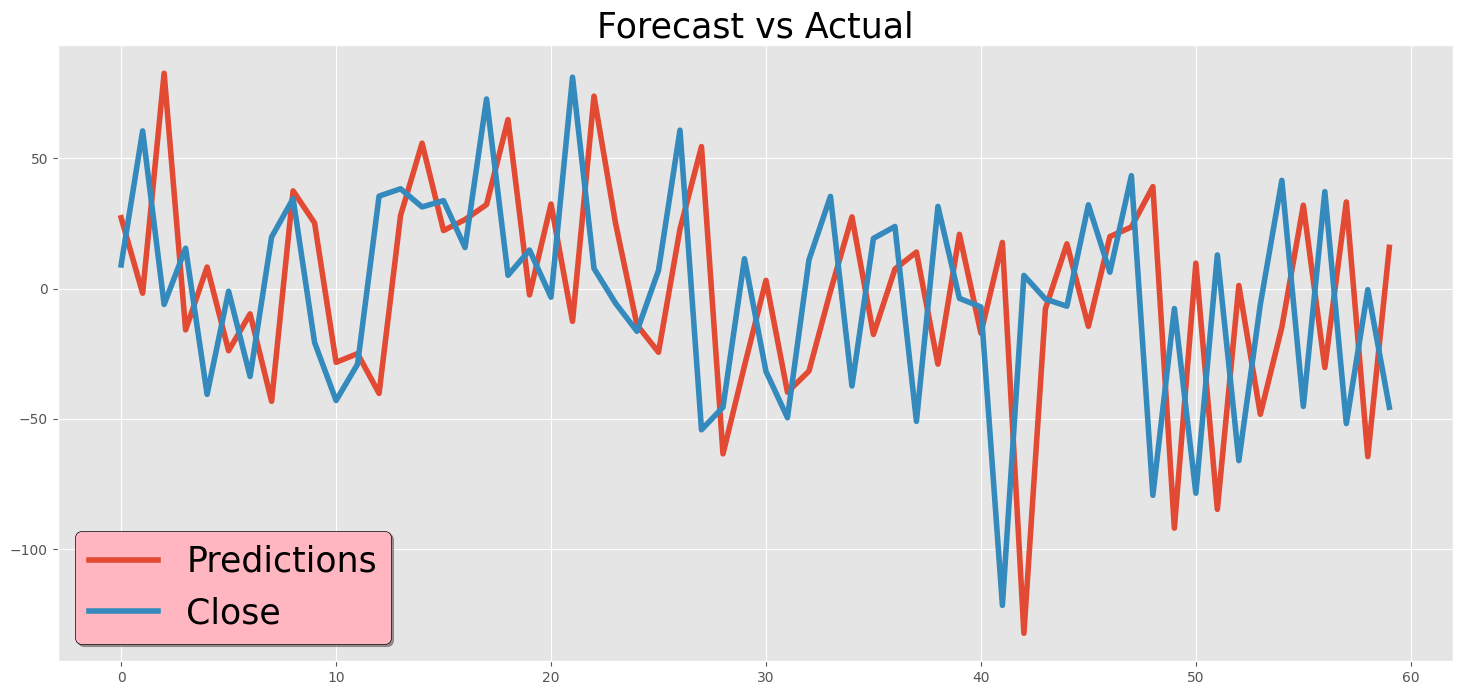

In [86]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')